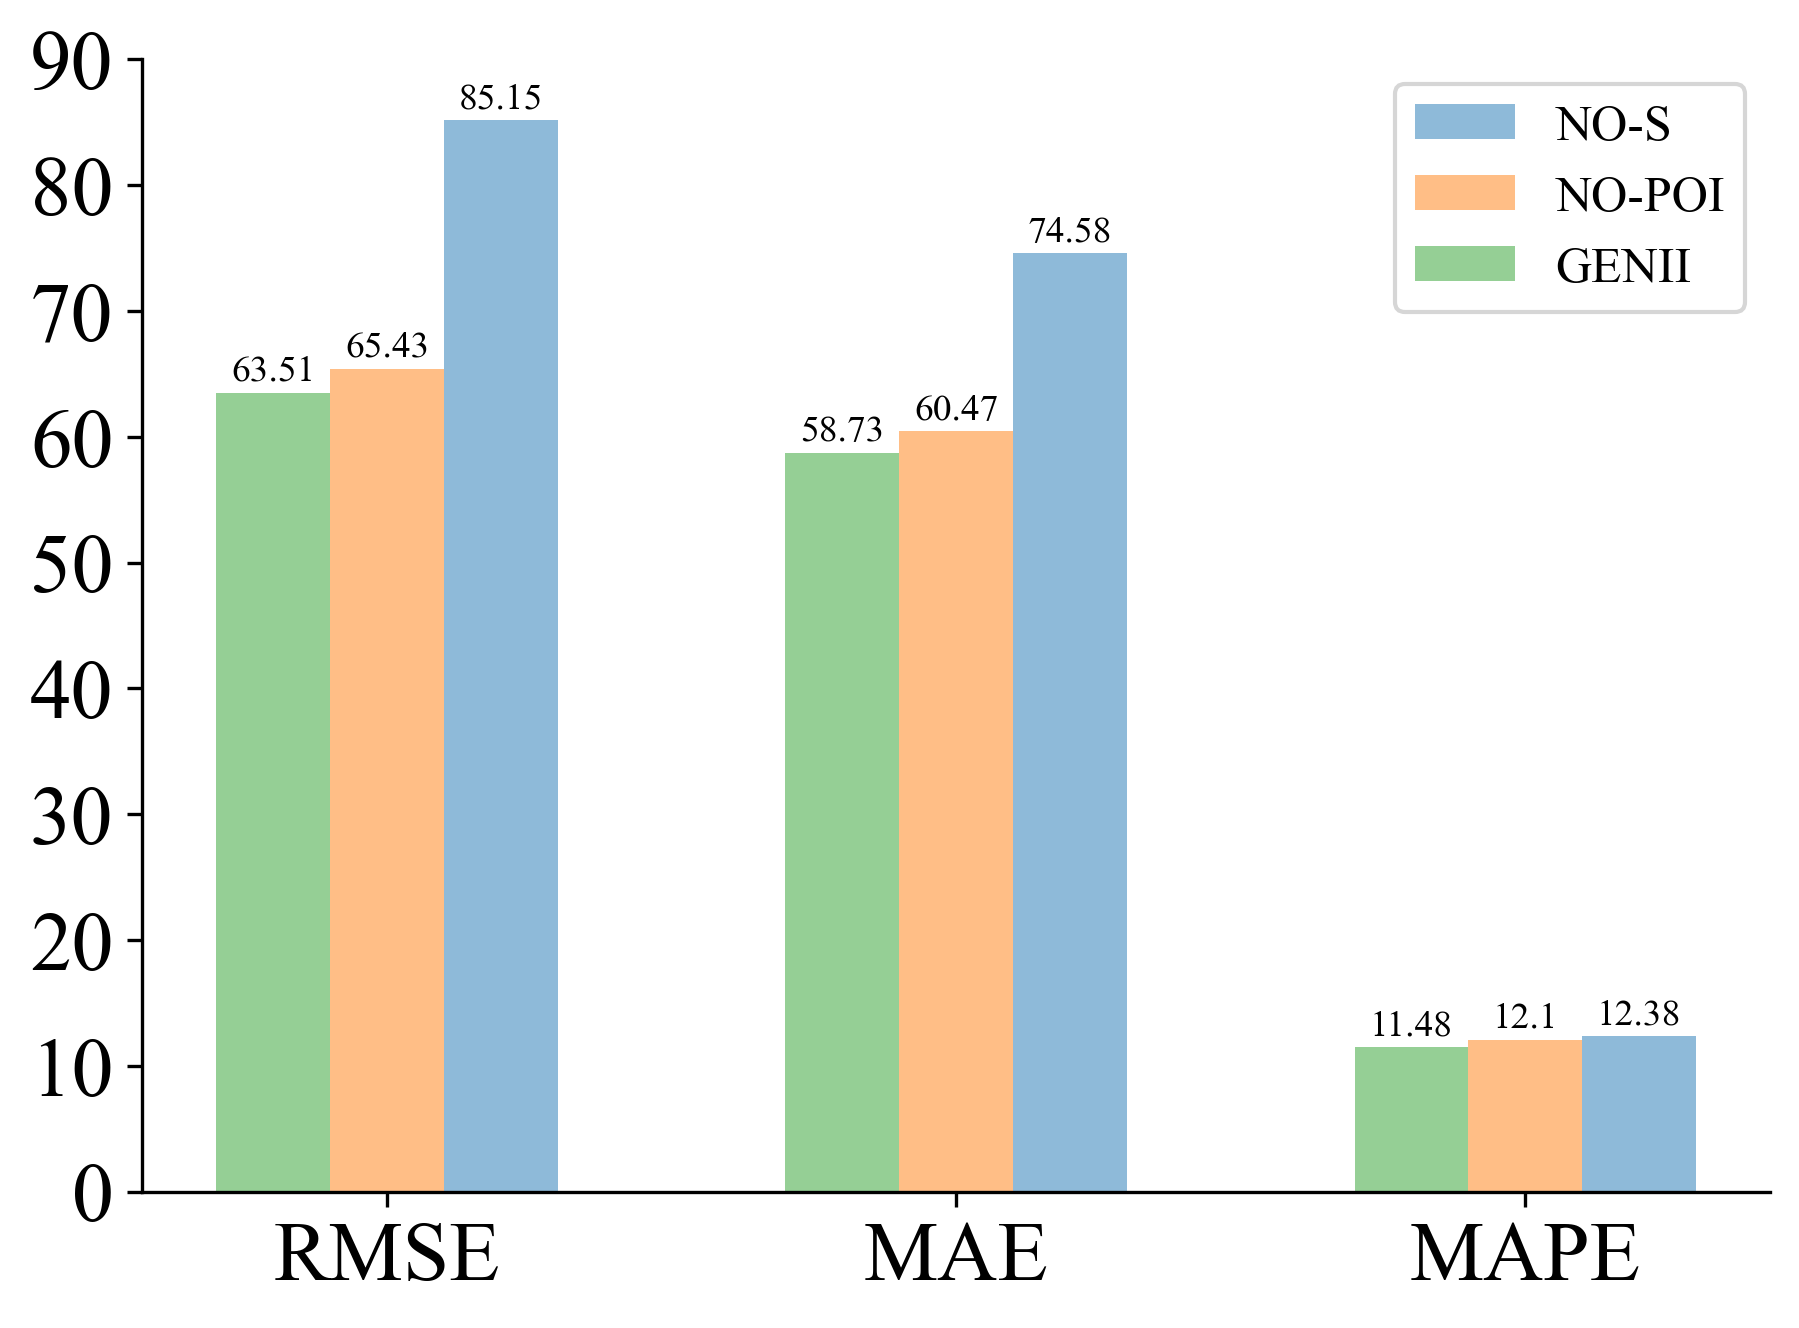

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.ticker import FuncFormatter
from matplotlib.pyplot import MultipleLocator, colorbar, FormatStrFormatter


# 全局设置字体为：Times New Roman
plt.rc('font',family='Times New Roman')
# 或者
# config = {"font.sans-serif": ['Times New Roman']}
# rcParams.update(config)

# 永久解决Times New Roman加粗的问题
# *运行一次就可以了*
# import matplotlib
# del matplotlib.font_manager.weight_dict['roman']
# matplotlib.font_manager._rebuild()

# 设置全局格式，包括字体风格和大小等等
# 不推荐使用
# config = {
#     "font.family":'serif',  # 'serif', 'sans-serif', or 'monospace'
#     "font.size": 20,
#     "mathtext.fontset":'stix',
#     "font.serif": ['SimSun'],
#     # "savefig.dpi": 300,
#     # "figure.dpi": 300,
# }
# rcParams.update(config)

# 数据准备
# x = [10, 20, 30, 40, 50]
# y1 = [5.825, 2.938, 1.573, 0.994, 0.729]
# y2 = [2.717, 1.038, 0.916, 0.788, 0.699]
# y3 = [1.297, 0.826, 0.815, 0.741, 0.698]
x = [10, 20, 30]
y1 = [12.38, 74.58, 85.15]
y2 = [12.1, 60.47, 65.43]
y3 = [11.48, 58.73, 63.51]


# 在柱状图上显示数字
def auto_text(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 1),  # 1 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=9)
        # ax.text(rect.get_x(), rect.get_height(), '%.3f' % rect.get_height(), ha='left', va='bottom',
        #         fontdict={'family': 'Times New Roman', 'size': 10})

# 创建一个画布
fig, ax = plt.subplots(figsize=(7,5),dpi=300)

# 画柱状
width = 2 # 柱状的宽度
rect1 = ax.bar(np.asarray(x)-width, y1, width=width, color='C0', alpha=0.5, label='NO-S')
rect2 = ax.bar(np.asarray(x), y2, width=width, color='C1', alpha=0.5, label='NO-POI')
rect3 = ax.bar(np.asarray(x)+width, y3, width=width, color='C2', alpha=0.5, label='GENII')

# legend（右上方框） 字体风格的大小设置
# plt.legend(prop={'family': 'Times New Roman', 'size': 20})
ax.legend(prop={'family': 'Times New Roman', 'size': 12})

# title 字体风格的大小设置

# ax.set_title('Ablation experiment results', fontdict={'family': 'Times New Roman', 'size': 20})

# x/y 轴标签的设置
# plt.xlabel('X', fontdict={'family': 'Times New Roman', 'size': 25})
# plt.ylabel('Y', fontdict={'family': 'Times New Roman', 'size': 25})

# ax.set_xlabel('X', fontdict={'family': 'Times New Roman', 'size': 25})
# ax.set_ylabel('Y', fontdict={'family': 'Times New Roman', 'size': 25})

# 设置y轴刻度间距
ax.yaxis.set_major_locator(MultipleLocator(10))

# 设置y轴数值显示风格
# 例如：显示小数点后两位 --> %.2f
# 整数显示 --> %d
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))

# 设置x/y轴刻度的显示
# plt.xticks(x, ['x1', 'x2', 'x3', 'x4', 'x5'], fontproperties = 'Times New Roman', size = 20)
# plt.yticks(fontproperties = 'Times New Roman', size = 20)

# 设置x轴的显示
ax.set_xticks(x)
ax.set_xticklabels(['MAPE', 'MAE', 'RMSE'])
# 设置刻度的字体大小
ax.tick_params(labelsize=20)
# 设置x/y轴的字体风格
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Times New Roman') for label in labels]

# 不显示x轴的标签以及刻度
# ax.axes.get_xaxis().set_visible(False)

# 不显示上面和右边的边框
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# 显示柱状上面的数字
auto_text(rect1)
auto_text(rect2)
auto_text(rect3)

# 转置x轴
ax.invert_xaxis()
# 转置y轴
# ax.invert_yaxis()

# 设置y轴的范围
# plt.ylim(0, 6)
ax.set_ylim(0, 90)
plt.savefig('./data/Ablation experiment results.png',dpi = 300)
plt.show()

